#                                        Mushroom Classification

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')


### Importing the Dataset

In [2]:
dataset = pd.read_csv('C:/Users/Dell/Desktop/Machine Learning/Practice/Edible Mushroom/mushrooms.csv')

In [3]:
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
for i in dataset.columns:
    print('Unique values in ',i, 'are',dataset[i].unique())

Unique values in  class are ['p' 'e']
Unique values in  cap-shape are ['x' 'b' 's' 'f' 'k' 'c']
Unique values in  cap-surface are ['s' 'y' 'f' 'g']
Unique values in  cap-color are ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
Unique values in  bruises are ['t' 'f']
Unique values in  odor are ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
Unique values in  gill-attachment are ['f' 'a']
Unique values in  gill-spacing are ['c' 'w']
Unique values in  gill-size are ['n' 'b']
Unique values in  gill-color are ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
Unique values in  stalk-shape are ['e' 't']
Unique values in  stalk-root are ['e' 'c' 'b' 'r' '?']
Unique values in  stalk-surface-above-ring are ['s' 'f' 'k' 'y']
Unique values in  stalk-surface-below-ring are ['s' 'f' 'y' 'k']
Unique values in  stalk-color-above-ring are ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
Unique values in  stalk-color-below-ring are ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
Unique values in  veil-type are ['p']
Unique values in  veil

### We can see the column `veil-type` has a constant value thus will have no impact in predicted values so the column can be dropped 

In [6]:
dataset = dataset.drop('veil-type', axis=1)

## Data Preprocessing

In [7]:
# Transform the Categorical variables using Cardinal Encoding
from sklearn.preprocessing  import LabelEncoder
le = LabelEncoder()
for i in dataset.columns:
    dataset[i] = le.fit_transform(dataset[i])
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int32
 1   cap-shape                 8124 non-null   int32
 2   cap-surface               8124 non-null   int32
 3   cap-color                 8124 non-null   int32
 4   bruises                   8124 non-null   int32
 5   odor                      8124 non-null   int32
 6   gill-attachment           8124 non-null   int32
 7   gill-spacing              8124 non-null   int32
 8   gill-size                 8124 non-null   int32
 9   gill-color                8124 non-null   int32
 10  stalk-shape               8124 non-null   int32
 11  stalk-root                8124 non-null   int32
 12  stalk-surface-above-ring  8124 non-null   int32
 13  stalk-surface-below-ring  8124 non-null   int32
 14  stalk-color-above-ring    8124 non-null 

###  *** A value of 1 in class represent poisonous mushroom (p) 

## Feature splitting 

#### Splitting data into targets and features

In [9]:
X = dataset.drop('class', axis=1)
y = dataset['class']

## Feature Evaluation

                     Feature       Scores  Importance(%)
8                 gill-color  5957.764469         39.084
17                 ring-type  1950.610146         12.796
7                  gill-size  1636.606833         10.737
3                    bruises  1194.277352          7.835
10                stalk-root  1186.029221          7.781
6               gill-spacing   826.795274          5.424
20                   habitat   751.309489          4.929
18         spore-print-color   379.132729          2.487
19                population   311.766736          2.045
11  stalk-surface-above-ring   222.982400          1.463
1                cap-surface   214.068544          1.404
12  stalk-surface-below-ring   206.648180          1.356
13    stalk-color-above-ring   119.792216          0.786
14    stalk-color-below-ring   109.789410          0.720
4                       odor    75.910163          0.498
9                stalk-shape    36.594105          0.240
16               ring-number   

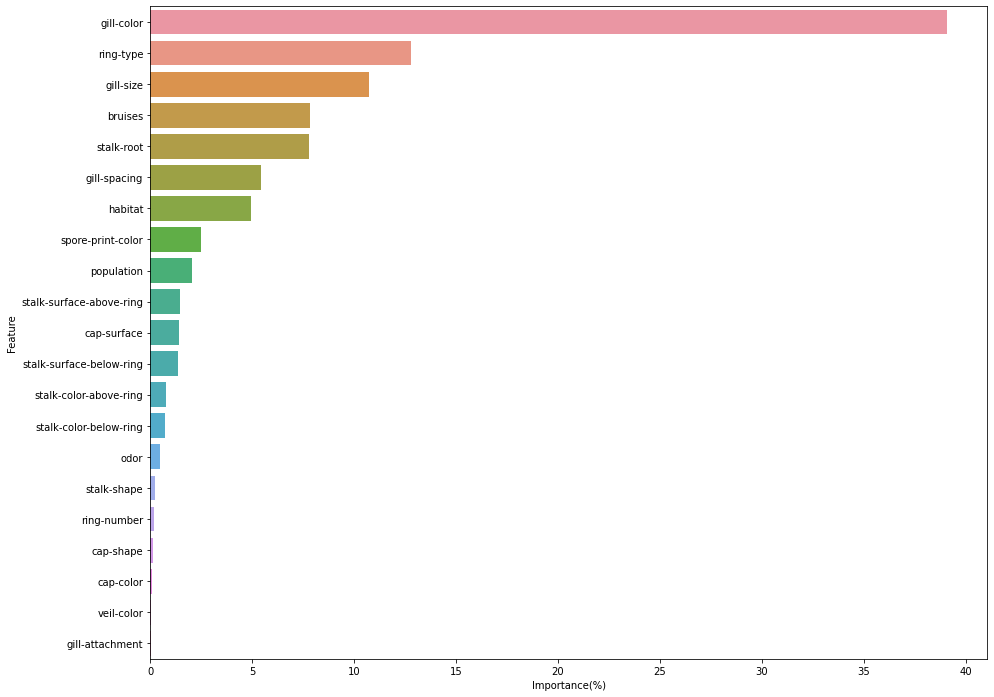

In [10]:
from sklearn.feature_selection import SelectKBest,chi2
fs = SelectKBest(score_func = chi2, k = 'all')
fs.fit(X,y)
percent = []
for i in fs.scores_:
    percent.append(round(((i/sum(fs.scores_))*100),3))
features_data = pd.DataFrame({'Feature':X.columns, 'Scores':fs.scores_,'Importance(%)':percent}).sort_values(by= ['Scores'],ascending = False)
plt.figure(figsize = (15,12))
sns.barplot('Importance(%)', 'Feature', orient = 'h', data = features_data )
print(features_data, '\n')
Insignificant = features_data.loc[features_data['Importance(%)'] < 0.005]['Feature'].unique()

In [12]:
X = X.drop(Insignificant,axis=1)

# EDA

<AxesSubplot:xlabel='class', ylabel='count'>

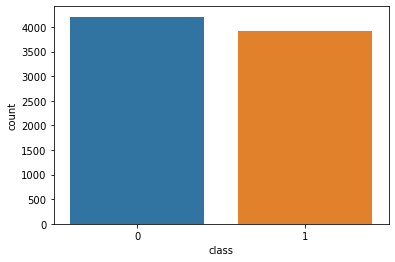

In [13]:
sns.countplot(dataset['class'])

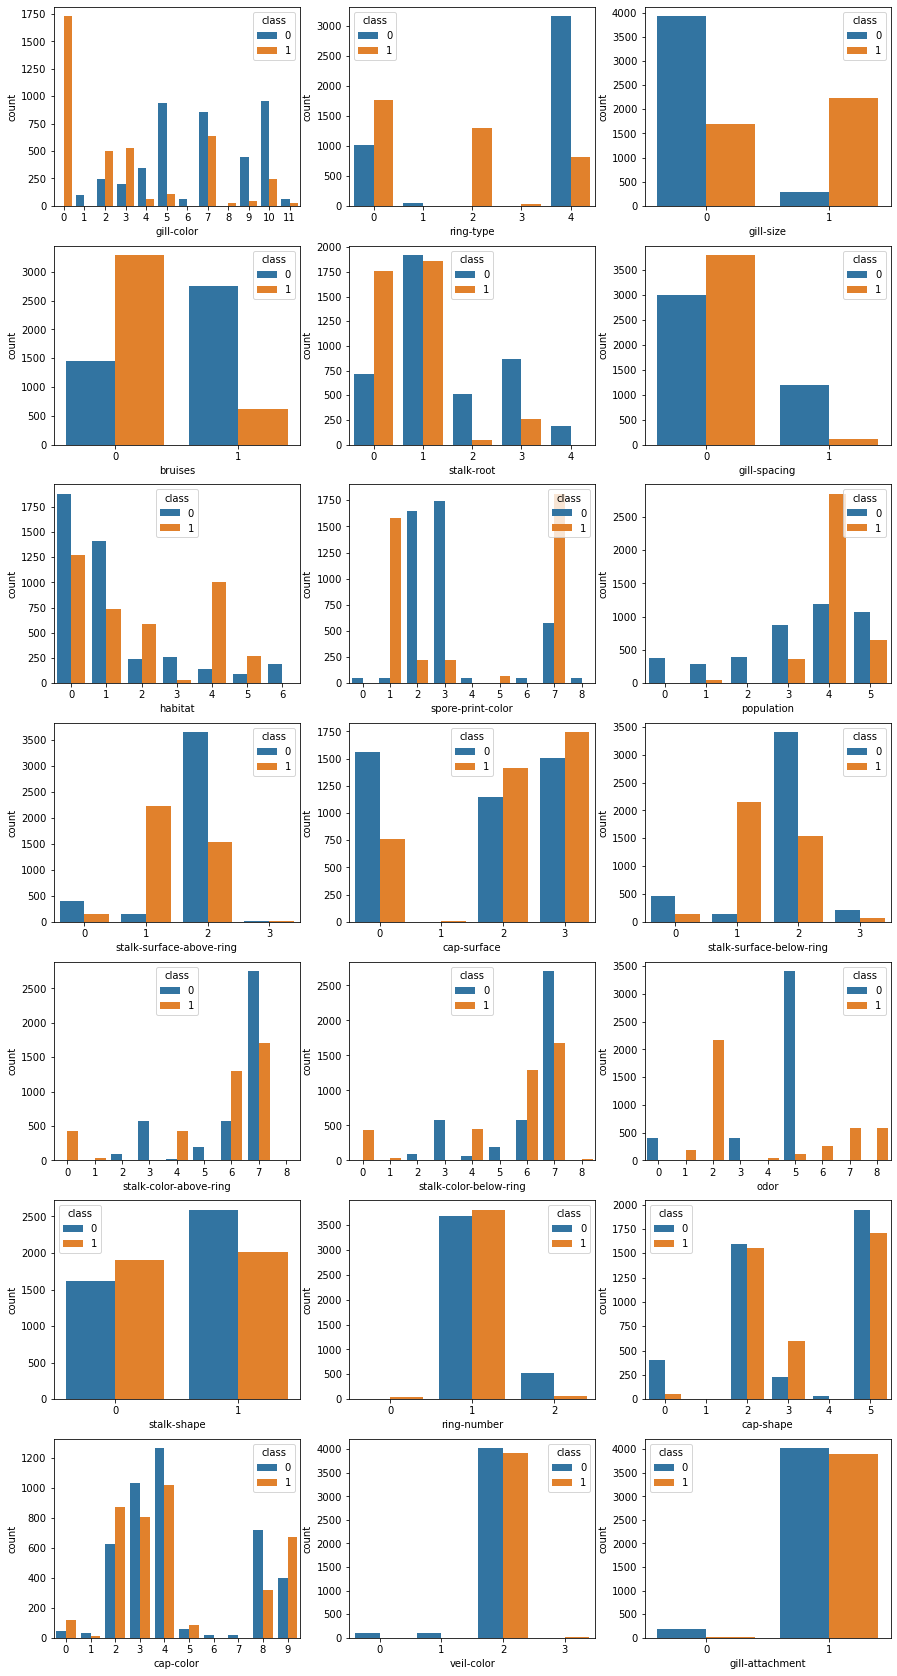

In [14]:
plt.figure(figsize = (15,30))
m=1
for i in features_data['Feature']:
    plt.subplot(7,3,m)
    sns.countplot(x = dataset[i], hue = dataset['class'])
    m=m+1
    

# Training and Splitting data

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

# Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model Building

In [17]:
from sklearn.metrics import accuracy_score,classification_report

#XGB
from xgboost import XGBClassifier
xgb = XGBClassifier()

#LogisticRegression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

# Support Vector Machine Classifier
from sklearn.svm import SVC
svc = SVC()

#KNearest Neighbour Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)



In [18]:
models_acc = []
models = [xgb, lr, rfc, svc, knn]
for i in models:
    i.fit(X_train,y_train)
    models_acc.append(accuracy_score(y_test,i.predict(X_test)))
models = pd.DataFrame({'Models': models, 'Accuracy Score':models_acc} )

[20:50:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [19]:
models = models.sort_values(by = ['Accuracy Score'],ascending = False).reset_index().drop('index',axis =1)
best = models['Models'][0]
models['Models'] = models['Models'].astype(str).str.split("(", n=2 ,expand = True)[0]
models

,Models,Accuracy Score
0,XGBClassifier,1.000000
1,RandomForestClassifier,1.000000
2,SVC,1.000000
3,KNeighborsClassifier,1.000000
4,LogisticRegression,0.956112


In [20]:
print('Hence the best model is',models['Models'][0],'with an accuracy of',round((models['Accuracy Score'][0]*100),2),'%')
print('\nThe classification report is:')
print(classification_report(y_test,best.predict(X_test)))

Hence the best model is XGBClassifier with an accuracy of 100.0 %

The classification report is:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1258
           1       1.00      1.00      1.00      1180

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

